# TensorFlow basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
# very simple dataset
# we will treat it as a regression problem, feature 1, feature 2 and price to predict

In [5]:
# supervised learning model

In [6]:
sns.pairplot(df)

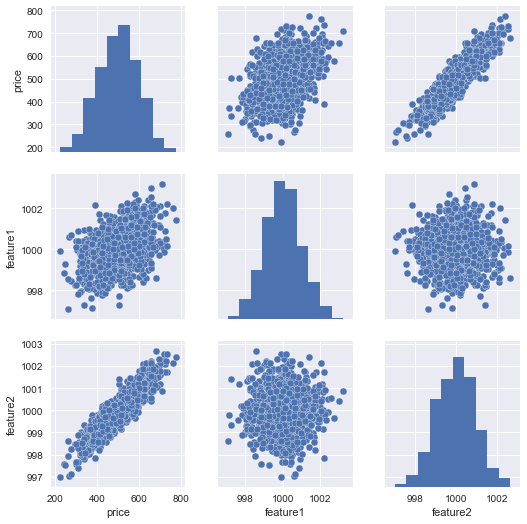

In [7]:
plt.show()

In [8]:
# feature 2 is veru corelated with price

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['feature1', 'feature2']].values # we will have to pass "Numpy arrays" instead of "Pandas arrays or series"
# adding .values to the dataframe returns a numpy array

In [11]:
y = df['price'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [14]:
# normalize or scale your data

In [15]:
# if we have really large values it could cause an error with weights

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, i.e. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : boolean, optional, default True
 |      Set to False to perform inplace row normalization and avoid a
 |   

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)
#calculates the parameter it needs to perform the actual scaling later on
# standard deviation, min amd max

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
X_train = scaler.transform(X_train) # this actually performs the transformation

In [21]:
# we ran 'fit' only on train set because we want to prevent 'Data leakage' from the test set, 
# we dont want to assume that we have prior information fo the test set
# so we only try to fit our scalar tot he training set, and donot try to look into the test set

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [21]:
X_train.max()

1.0

In [22]:
X_train.min()

0.0

In [26]:
# it has been scaled now

In [27]:
# time to create our neural network

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense

In [25]:
#help(Sequential)

In [26]:
# there is 2 ways to making a Keras based model

In [36]:
# 1 way to do this is:
model = Sequential([Dense(4, activation='relu'), # Layer 1, 4 neurons, activation function = Relu
                   Dense(2, activation='relu'), # Layer 2, 2 neurons, activation function = Relu
                   Dense(1)]) # output layer

In [38]:
# other way to do this is:
model = Sequential() # empty sequential model

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
# easier to turn off a layer in this

In [27]:
model = Sequential() # empty sequential model

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [28]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256406.6719
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256176.2812
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255939.0156
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255676.0469
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255384.1562
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255060.0625
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254702.9062
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254309.9375
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 253877.6406
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 253407.1094
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 252894.5625
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 3ms/step - loss: 1713.0798
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1669.6729
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1621.3573
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1579.7335
Epoch 100/250
22/22 [==============================] - 0s 3ms/step - loss: 1532.6750
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 1487.2261
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 1445.4899
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 1408.7980
Epoch 104/250
22/22 [==============================] - 0s 4ms/step - loss: 1361.5863
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 1319.9908
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 1274.6278
Epoch 107/250
22/22 [==============================] - 0s 4ms/step - loss: 1226.61

22/22 [==============================] - 0s 2ms/step - loss: 24.2923
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 24.0889
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5394
Epoch 197/250
22/22 [==============================] - 0s 4ms/step - loss: 24.6277
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 24.5067
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 24.6768
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 24.7931
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2959
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 24.3874
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 24.6553
Epoch 204/250
22/22 [==============================] - 0s 3ms/step - loss: 24.4231
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4690
Epoch 206/250
22/2

In [29]:
loss_df = pd.DataFrame(model.history.history)

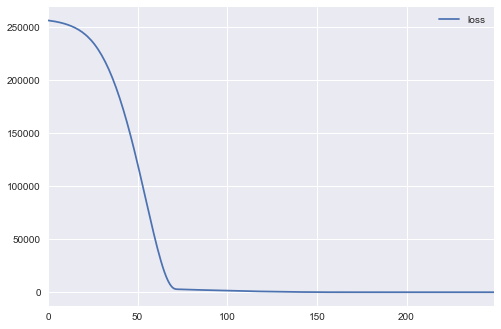

In [30]:
loss_df.plot()
plt.show()

In [31]:
# how well this model peroforms on test data

In [33]:
# It outputs the model's Loss
model.evaluate(X_test, y_test, verbose=0)

25.11762809753418

In [34]:
# in our case the loss metric ins MSE
# so MSE is 25.11

In [35]:
model.evaluate(X_train, y_train, verbose=0)

24.47309112548828

In [36]:
test_predictions = model.predict(X_test)

In [37]:
test_predictions

array([[404.7841 ],
       [622.9558 ],
       [591.56055],
       [571.6577 ],
       [366.119  ],
       [578.6106 ],
       [514.5021 ],
       [458.58505],
       [548.68506],
       [447.00192],
       [611.2063 ],
       [548.3944 ],
       [418.58896],
       [408.36157],
       [650.6543 ],
       [436.78397],
       [507.91464],
       [659.3299 ],
       [661.98376],
       [564.9769 ],
       [333.7446 ],
       [444.31384],
       [382.0269 ],
       [378.25928],
       [566.0315 ],
       [610.0102 ],
       [531.8389 ],
       [427.34732],
       [654.8458 ],
       [413.57523],
       [442.11966],
       [484.594  ],
       [437.89752],
       [681.2412 ],
       [424.24927],
       [417.17392],
       [501.39365],
       [549.9186 ],
       [509.1863 ],
       [394.84982],
       [618.01074],
       [416.1207 ],
       [603.8738 ],
       [445.4442 ],
       [501.44913],
       [581.15375],
       [668.4061 ],
       [489.86935],
       [318.10733],
       [484.8928 ],


In [38]:
test_predictions = pd.Series(test_predictions.reshape(300,))


In [39]:
test_predictions

0      404.784088
1      622.955811
2      591.560547
3      571.657715
4      366.118988
5      578.610596
6      514.502075
7      458.585052
8      548.685059
9      447.001923
10     611.206299
11     548.394409
12     418.588959
13     408.361572
14     650.654297
15     436.783966
16     507.914642
17     659.329895
18     661.983765
19     564.976929
20     333.744598
21     444.313843
22     382.026886
23     378.259277
24     566.031494
25     610.010193
26     531.838928
27     427.347321
28     654.845825
29     413.575226
          ...    
270    563.935547
271    447.499939
272    533.865723
273    381.298126
274    500.983002
275    636.525879
276    496.019989
277    567.834534
278    469.587799
279    272.855927
280    516.824707
281    620.826660
282    350.031189
283    449.927979
284    498.756378
285    542.426758
286    611.256470
287    387.680450
288    448.882599
289    481.886810
290    597.748657
291    498.847076
292    320.985199
293    554.593628
294    444

In [43]:
pred_df =  pd.DataFrame(y_test, columns=['Test True Y'])

In [44]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
5,584.381108
6,514.405641
7,464.115870
8,551.650100
9,451.804172


In [45]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [47]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [48]:
pred_df

,Test True Y,Model Predictions
0,402.296319,404.784088
1,624.156198,622.955811
2,582.455066,591.560547
3,578.588606,571.657715
4,371.224104,366.118988
5,584.381108,578.610596
6,514.405641,514.502075
7,464.115870,458.585052
8,551.650100,548.685059
9,451.804172,447.001923


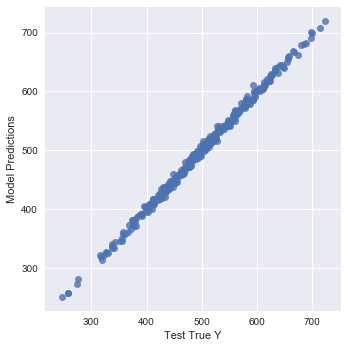

In [54]:
sns.lmplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df, scatter=True, fit_reg=False)
plt.show()

In [55]:
# to grab different error metrics

In [56]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [57]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.011380020065317

In [58]:
# how do i know if it is good or bad?
# that depends on training data

In [59]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [60]:
# here mean price is 498 $ and our mean absolute error is 1.01 which is roughly 1%, so this error is pretty good

In [61]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.11763302573696

In [62]:
# this is exactly same as :
# model.evaluate(X_test, y_test, verbose=0)

In [63]:
# RMSE
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.011749497504535

In [64]:
# predicting on brand new data
# i pick this gemstone from the ground
new_gem = [[998, 1000]]

In [65]:
# first thing is, our model is trained on 'scaled features'
# so we first need to scale this new data as per our scaler

In [68]:
new_gem = scaler.transform(new_gem)

In [69]:
model.predict(new_gem)

array([[419.17047]], dtype=float32)

In [70]:
# we should price it at 420 $

In [71]:
# IF your are running a very complex model that took a lot of time to train
# yout would want to make sure you save that model
from tensorflow.keras.models import load_model

In [72]:
model.save('my_gem_model.h5')

In [73]:
# now I can use the load model command

In [75]:
later_model = load_model('my_gem_model.h5')

In [76]:
later_model.predict(new_gem)

array([[419.17047]], dtype=float32)

In [ ]:
# works as well!!!